In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
(X_train, y_train) , (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


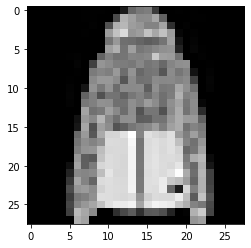

In [ ]:
plt.imshow(X_train[22],cmap='gray')

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

DATA VISUALIZATION

In [ ]:
y_train.shape

(60000,)

In [ ]:

y_test.shape

(10000,)

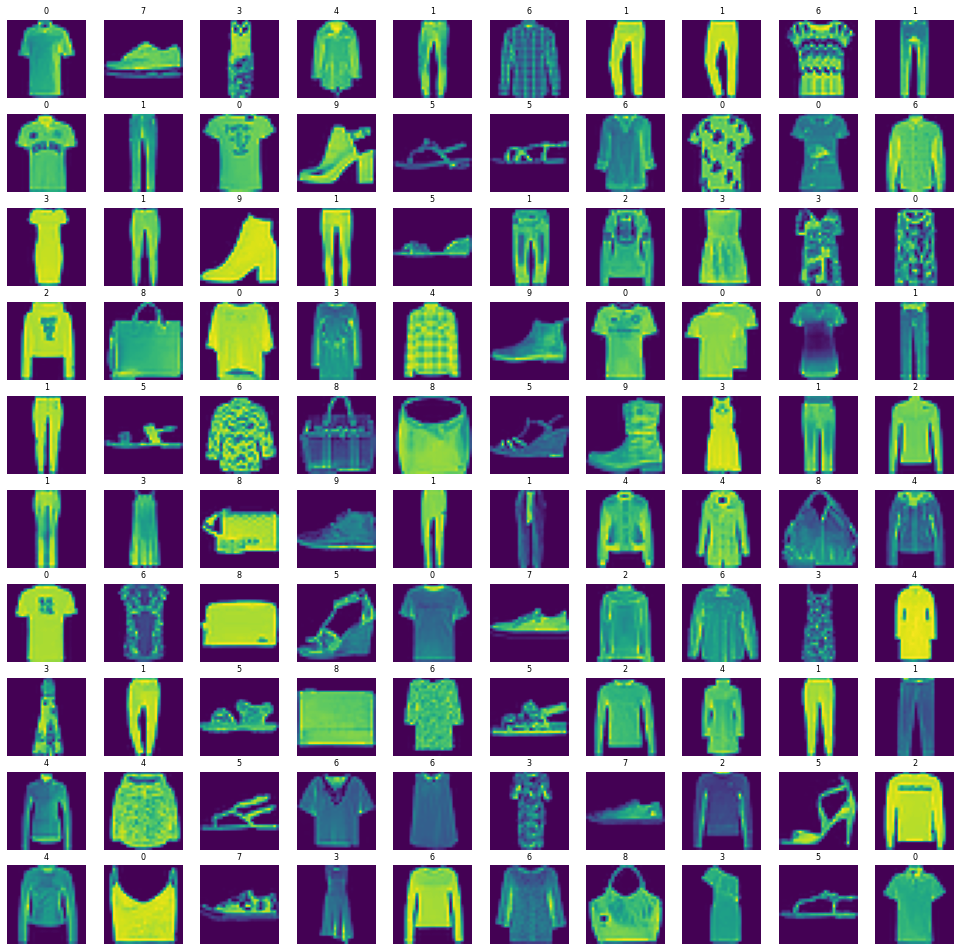

In [ ]:
W_grid = 10
L_grid = 10

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
axes = axes.ravel() 

n_training = len(X_train) 

for i in np.arange(0,W_grid*L_grid):
    index = np.random.randint(0,n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize = 8)
    axes[i].axis('off')



#  PERFORM DATA PREPROCESSING

In [ ]:
# normalize data
X_train  = X_train/255
X_test = X_test/255

In [ ]:
# add some noise
noisefactor = 0.3
noisydata = []

for img in X_train:
    noisyimg = img + noisefactor * np.random.randn(*img.shape)
    noisyimg = np.clip(noisyimg, 0. , 1. ) #since pixel may be>1
    noisydata.append(noisyimg)
noisydata = np.array(noisydata)

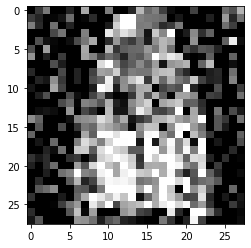

In [ ]:
plt.imshow(noisydata[22],cmap='gray')

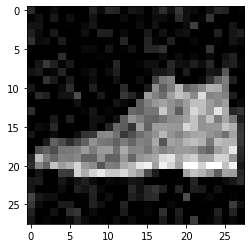

In [ ]:
# add noise to testing dataset
noisefactor = 0.1
noisytest = []

for img in X_test:
    noisyimg = img + noisefactor * np.random.randn(*img.shape)
    noisyimg = np.clip(noisyimg,0 , 1) #since pixel may be>1
    noisytest.append(noisyimg)

noisytest = np.array(noisytest)
plt.imshow(noisytest[0], cmap='gray')

# BUILD AND TRAIN AUTOENCODER DEEP LEARNING MODEL

In [ ]:
autoencoder = tf.keras.models.Sequential()
#encoder
autoencoder.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=2, padding = 'same', input_shape=(28,28,1)))

autoencoder.add(tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=2, padding = 'same'))

autoencoder.add(tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=1, padding = 'same'))

#decoder
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding = 'same'))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=3, strides=2, padding = 'same',activation='sigmoid'))






In [ ]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.fit(noisydata.reshape(-1, 28, 28, 1),
               X_train.reshape(-1, 28, 28, 1),
               epochs = 10,
               batch_size = 200,
               validation_data = (noisytest.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1)))

Epoch 1/10
300/300 [==============================] - 1s 4ms/step - loss: 0.4005 - val_loss: 0.3195
Epoch 2/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3163 - val_loss: 0.3029
Epoch 3/10
300/300 [==============================] - 1s 3ms/step - loss: 0.3089 - val_loss: 0.2973
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3059 - val_loss: 0.2943
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3042 - val_loss: 0.2928
Epoch 6/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3032 - val_loss: 0.2913
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3025 - val_loss: 0.2908
Epoch 8/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3019 - val_loss: 0.2892
Epoch 9/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3015 - val_loss: 0.2891
Epoch 10/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3010 - val_loss: 0.2885

# EVALUATE TRAINED MODEL PERFORMANCE

In [ ]:
evaluation = autoencoder.evaluate(noisytest.reshape(-1,28,28,1), X_test.reshape(-1,28,28,1))
print('test acc :{:.3f}'.format(evaluation))

313/313 [==============================] - 1s 2ms/step - loss: 0.2885
test acc :0.288


In [ ]:
predicted  =autoencoder.predict(noisytest[:10].reshape(-1,28,28,1))

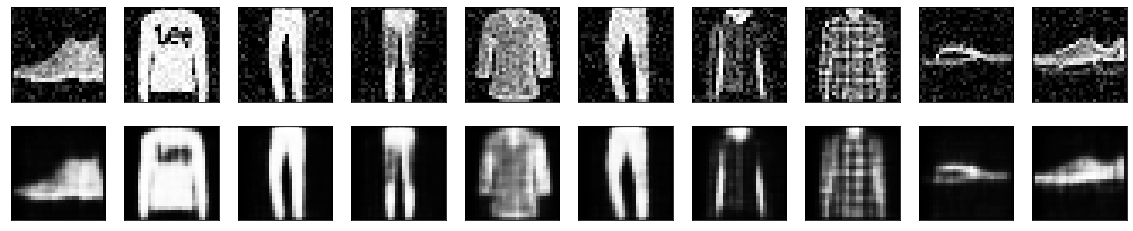

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([noisytest[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)